In [2]:
# design model (input size , output size, forward pass)
# 2) construct loss and optimizer
# 3) training loop
    ##  forward pass: compute prediction
    ##  backward pass : gradients
    ##  update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt



epoch: 10, loss = 4345.5571
epoch: 20, loss = 3241.6582
epoch: 30, loss = 2443.3760
epoch: 40, loss = 1865.4614
epoch: 50, loss = 1446.6508
epoch: 60, loss = 1142.8534
epoch: 70, loss = 922.2908
epoch: 80, loss = 762.0291
epoch: 90, loss = 645.4949
epoch: 100, loss = 560.6993


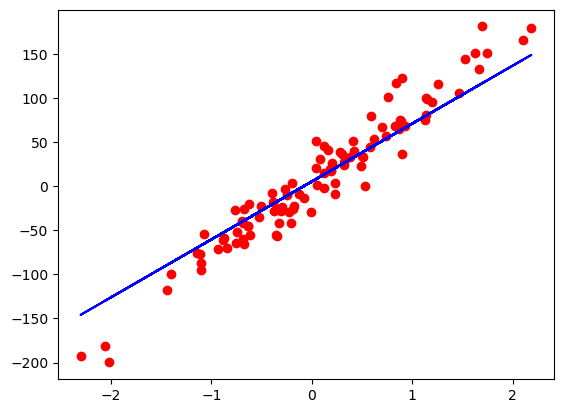

In [17]:
# 0) Prepare data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32)) 
Y = torch.from_numpy(Y_numpy.astype(np.float32)) 
y = Y.view(Y.shape[0], 1)

n_Samples, n_features = X.shape

# 1) Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)


# 2) Loss and Optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pss and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward pass
    loss.backward()

    # Update
    optimizer.step()

    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

